importo librerias

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cargo data


In [9]:
data=pd.read_csv('../data/raw/train.csv')

verificar la estructura

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.Age.describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

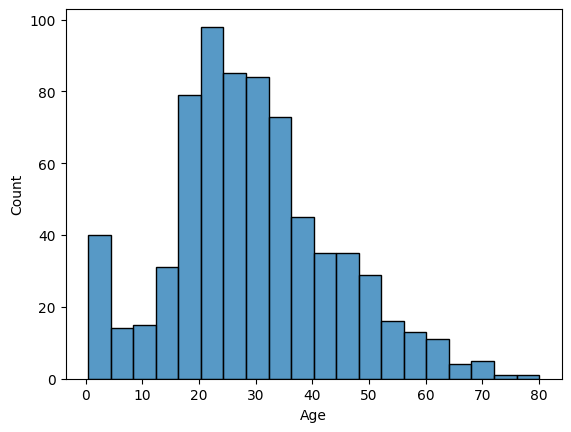

In [19]:
sns.histplot(data.Age)

Estandarizar escalar datos

<Axes: xlabel='Age_Scaler', ylabel='Count'>

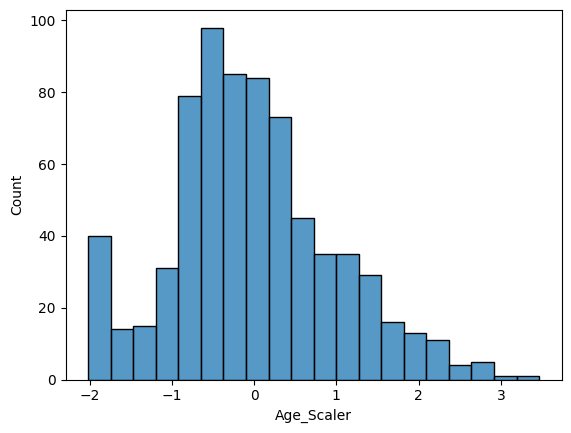

In [20]:
scaler = StandardScaler()
data['Age_Scaler'] = scaler.fit_transform(data[['Age']])
sns.histplot(data.Age_Scaler, bins=20)

Normalizar datos

<Axes: xlabel='Age_Norm', ylabel='Count'>

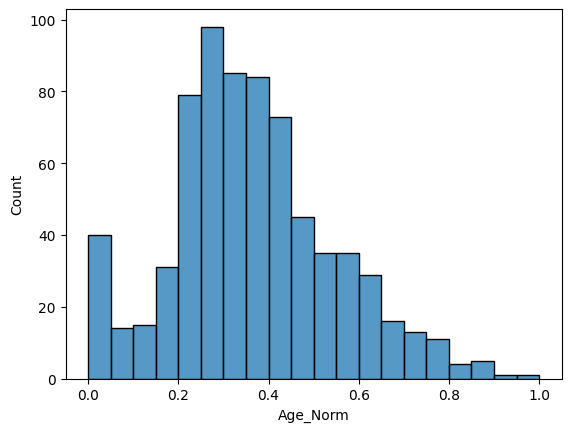

In [21]:
norm= MinMaxScaler()
data['Age_Norm'] = norm.fit_transform(data[['Age']])
sns.histplot(data.Age_Norm)

transformacion logaritmica


<Axes: xlabel='Age_log', ylabel='Count'>

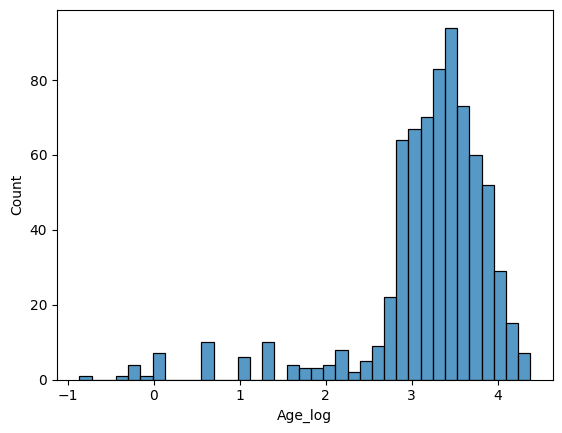

In [23]:
data["Age_log"] = np.log(data["Age"])
sns.histplot(data.Age_log)

<Axes: xlabel='Age_log', ylabel='Count'>

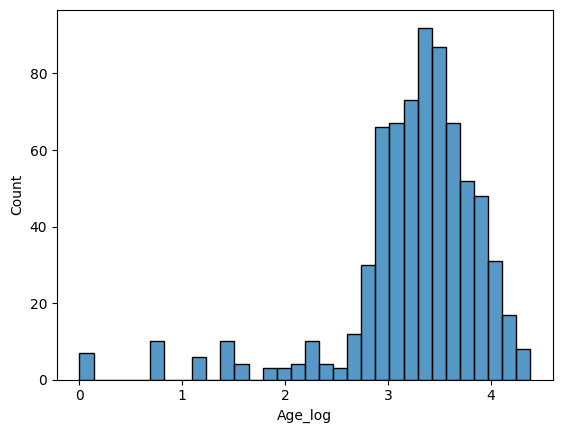

In [24]:
data["Age"]=data ["Age"].apply(lambda x: x*80 if x<1 else x)
data["Age_log"] =np.log(data["Age"])
sns.histplot(data.Age_log)


Split de los datos

In [25]:
x=data.drop(columns=['Survived'], axis=1)
y=data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, stratify=y, shuffle=True)

validar tamaño de cada muestra

In [26]:
x_train.shape

(668, 14)

In [27]:
x_test.shape

(223, 14)

In [28]:
y_train.value_counts() /len(y_train)

Survived
0    0.616766
1    0.383234
Name: count, dtype: float64

In [29]:
y_test.value_counts() /len(y_test)

Survived
0    0.61435
1    0.38565
Name: count, dtype: float64

In [ ]:
x_train=norm.fit_transform(x_train)
x_test=norm.transform(x_test)

Validacion cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
resultados = cross_val_score(modelo, x,y, cv=kf scoring='accuracy')